In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('../data/data_all_clear.csv')
df.sample(5)

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,defendant_case_perc,rating_ya,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito
2597,a090701137410a,2022-11-04 00:00:00,1,0.0,0.0,0.0,386.0,0.0,1.0,0.0,...,0.0,-1.0,NaN,-1.0,-1.000000,-1.0,-1.00,-1.0,-1.0,-1.0
9365,a540109678474a,2021-06-03 00:00:00,6,0.0,0.0,0.0,510.0,0.0,4.0,0.0,...,0.0,-1.0,0.0,0.0,4.166667,0.0,4.75,16.0,-1.0,-1.0
8617,a400102423895a,2022-10-31 00:00:00,2,0.0,0.0,0.0,1566.0,0.0,2.0,0.0,...,0.0,-1.0,NaN,-1.0,4.000000,0.0,-1.00,-1.0,-1.0,-1.0
14715,a230815455050a,2022-11-03 00:00:00,1,0.0,0.0,0.0,1359.0,0.0,1.0,0.0,...,0.0,-1.0,NaN,-1.0,-1.000000,-1.0,-1.00,-1.0,-1.0,-1.0
998,a230810048982a,2021-11-16 00:00:00,2,0.0,0.0,0.0,747.0,0.0,2.0,0.0,...,0.0,-1.0,NaN,-1.0,-1.000000,-1.0,0.00,0.0,4.9,85.0


In [6]:
rating_columns = [
    "rating_ya",
    "rating_yell",
    "rating_avito",
    "rating_2gis"
]
rating_count_columns = [
    "ratings_cnt_ya"
]
reviews_count_columns = [
    "ratings_cnt_ya",
    #"reviews_cnt_ya",
    "reviews_cnt_yell",
    "reviews_cnt_avito",
    "reviews_cnt_2gis",
]

phones = [
    "phb_bad_perc_dir",
    "phb_all_dir",  # !
    "phb_all_bad_dir",  # !
    "phb_dirty_dir",
    "phb_fraud_dir",
    "phb_bad_perc",
    "found_phones_dir",
    "phb_all",
    "phb_all_bad",
    "phb_dirty",
    "phb_fraud",
    "found_phones",
    "phones_num"

]

bank_and_police = [
    "total_defendant_case_amt",
    "defendant_case_perc",
    "total_defendant_case_cnt",
    "total_case_cnt",
    "mvd_request_num",
    "complaints_num_dir",
    "complaints_num",
    "claims_percent",
    "appl_num",
    "bad_rep_tcb"
]

data_without_description = [
    "claims_num"
]

In [7]:
df['all_reviews_cnt'] = df[reviews_count_columns].sum(axis=1)

In [8]:
def get_mean_rating(row):
    sm = n = 0
    for r, cnt in zip(row[rating_columns], row[reviews_count_columns]):
        if r > 0:
            sm += r * cnt
            n += cnt
    if n == 0:
        return 0
    return sm / n


df['mean_rating'] = df.apply(lambda x: get_mean_rating(x), axis=1)
df.head()

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito,all_reviews_cnt,mean_rating
0,a782615660478a,2022-10-30 00:00:00,1,0.0,2.0,2.0,1498.0,0.13,1.0,0.0,...,0.0,15.0,4.000000,0.0,0.000000,0.0,-1.0,-1.0,-1.0,0.000000
1,a7706752171a,2022-01-15 00:00:00,16,0.0,0.0,0.0,2421.0,0.00,16.0,0.0,...,114.0,39.0,3.700000,1.0,0.142857,2.0,4.8,5.0,122.0,4.107260
2,a745212602258a,2021-06-03 00:00:00,4,0.0,0.0,0.0,1503.0,0.00,3.0,0.0,...,0.0,4.0,4.000000,0.0,0.000000,0.0,-1.0,-1.0,-1.0,0.000000
3,a2466264323a,2022-09-25 00:00:00,3,0.0,0.0,0.0,77.0,0.00,2.0,0.0,...,0.0,2.0,4.500000,0.0,4.800000,5.0,-1.0,-1.0,4.0,4.800000
4,a7728551510a,2022-04-28 00:00:00,161,4.0,2.0,6.0,17842.0,0.03,145.0,0.0,...,21338.0,5772.0,4.244828,308.0,1.358362,2943.0,-1.0,-1.0,24588.0,3.817063


In [9]:
q = [122, 520, 1318, 2758, 1e9]

def get_size(phb_cnt):
    for i, v in enumerate(q):
        if phb_cnt <= v:
            return i


df['popularity'] = df['phb_all'].apply(lambda x: get_size(x))
df

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito,all_reviews_cnt,mean_rating,popularity
0,a782615660478a,2022-10-30 00:00:00,1,0.0,2.0,2.0,1498.0,0.13,1.0,0.0,...,15.0,4.000000,0.0,0.000000,0.0,-1.0,-1.0,-1.0,0.000000,3
1,a7706752171a,2022-01-15 00:00:00,16,0.0,0.0,0.0,2421.0,0.00,16.0,0.0,...,39.0,3.700000,1.0,0.142857,2.0,4.8,5.0,122.0,4.107260,3
2,a745212602258a,2021-06-03 00:00:00,4,0.0,0.0,0.0,1503.0,0.00,3.0,0.0,...,4.0,4.000000,0.0,0.000000,0.0,-1.0,-1.0,-1.0,0.000000,3
3,a2466264323a,2022-09-25 00:00:00,3,0.0,0.0,0.0,77.0,0.00,2.0,0.0,...,2.0,4.500000,0.0,4.800000,5.0,-1.0,-1.0,4.0,4.800000,0
4,a7728551510a,2022-04-28 00:00:00,161,4.0,2.0,6.0,17842.0,0.03,145.0,0.0,...,5772.0,4.244828,308.0,1.358362,2943.0,-1.0,-1.0,24588.0,3.817063,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14991,a390609289521a,2022-10-25 00:00:00,1,0.0,0.0,0.0,669.0,0.00,1.0,0.0,...,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0,-3.0,0.000000,2
14992,a560206225313a,2021-03-13 00:00:00,1,0.0,0.0,0.0,1.0,0.00,1.0,0.0,...,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0,-3.0,0.000000,0
14993,a503610997836a,2021-05-08 00:00:00,1,0.0,0.0,0.0,177.0,0.00,1.0,0.0,...,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0,-3.0,0.000000,1
14994,a212406459136a,2022-11-01 00:00:00,2,0.0,0.0,0.0,521.0,0.00,2.0,0.0,...,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0,-3.0,0.000000,2


In [10]:
has_reviews = df[(df.all_reviews_cnt > 0) & (df.phb_all > 0)]
sorted_phb_all = has_reviews.phb_all.sort_values()
sorted_reviews = has_reviews.all_reviews_cnt.sort_values()
N = df.shape[0]
M = has_reviews.shape[0]

def check_reviews_count(phb, reviews):
    # phb, reviews = a, b
    phb_ind = sorted_phb_all.searchsorted(phb)
    reviews_ind = sorted_reviews.searchsorted(reviews)
    phb_perc = phb_ind / M * 100
    reviews_perc = reviews_ind / M * 100
    return reviews_perc - phb_perc > 50

In [11]:
susp_reviews_cnt = df[df.apply(lambda x: check_reviews_count(x.phb_all, x.all_reviews_cnt), axis=1)]
susp_reviews_cnt[['phb_all', 'all_reviews_cnt']]

,phb_all,all_reviews_cnt
107,116.0,973.0
126,45.0,50.0
128,318.0,189.0
154,877.0,317.0
223,238.0,296.0
...,...,...
13760,231.0,93.0
13762,654.0,207.0
14074,30.0,604.0
14370,2.0,2877.0


In [12]:
def check_rating(columns):
    for a in columns:
        if a <= 0:
            continue
        for b in columns:
            if b <= 0:
                continue
            if abs(a - b) > 2.5:
                return True
    return False


susp_rating = df[(df[rating_columns].apply(lambda x: check_rating(x), axis=1))
                 & (df.all_reviews_cnt > 10)]
susp_rating[rating_columns]

,rating_ya,rating_yell,rating_avito,rating_2gis
1,4.15,3.700000,4.8,0.142857
4,4.15,4.244828,-1.0,1.358362
5,4.90,4.500000,-1.0,2.000000
45,4.34,4.333333,-1.0,1.500000
47,1.19,4.285714,-1.0,0.046296
...,...,...,...,...
14685,0.18,4.230769,-1.0,0.350000
14686,2.70,4.125000,-1.0,0.095238
14787,4.42,4.406250,-1.0,0.680952
14798,3.37,4.000000,-1.0,0.090909


In [13]:
frauds = pd.concat([susp_reviews_cnt, susp_rating])
frauds.shape[0] / df.shape[0] * 100

7.061883168845025

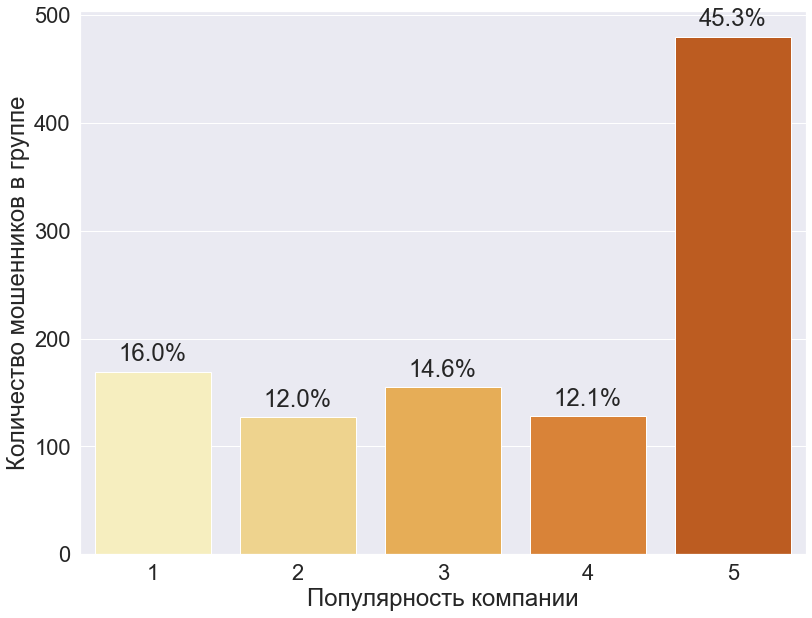

In [38]:
plt.figure(figsize=(13, 10))
sns.set(font_scale=2)
ax = sns.countplot(x=frauds.popularity, palette=sns.color_palette("YlOrBr"))
ax.set_xticklabels([1, 2, 3, 4, 5])
plt.xlabel("Популярность компании")
plt.ylabel("Количество мошенников в группе")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/frauds.shape[0])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x-0.4, y + 10), ha='center')
plt.savefig("../figures/perc_rew_cnt.png", dpi=200, )
plt.show()

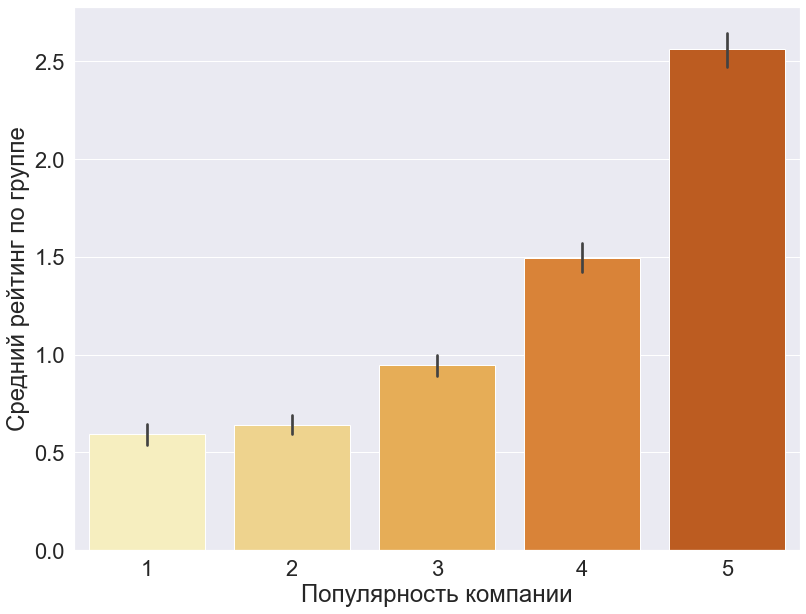

In [37]:
plt.figure(figsize=(13, 10))
sns.set (font_scale=2)
ax = sns.barplot(x=df.popularity, y=df.mean_rating, palette=sns.color_palette("YlOrBr"))
ax.set_xticklabels([1, 2, 3, 4, 5])
# h, l = ax.get_legend_handles_labels()
plt.xlabel("Популярность компании")
plt.ylabel("Средний рейтинг по группе")
plt.savefig("../figures/mean_rating_by_group.png", dpi=200)
plt.show()